In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=46)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

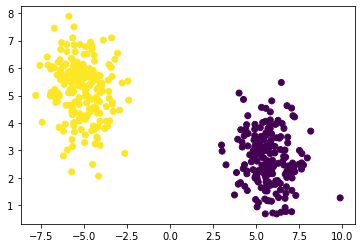

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

In [4]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [5]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [6]:
knn.predict([[1, 1]])

array([0])

In [7]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# training
nb.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Implementation on Titanic Dataset

In [9]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


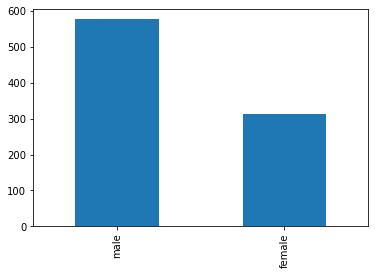

In [10]:
df.Sex.value_counts().plot(kind='bar');

In [11]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1, inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [13]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

num_values =['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_values = ['Sex']

X_train_num = X_train[num_values]
X_train_cat = X_train[cat_values]
X_test_num = X_test[num_values]
X_test_cat = X_test[cat_values]

imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_num)

X_train_num_prep = imputer.transform(X_train_num)
X_test_num_prep = imputer.transform(X_test_num)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train_num_prep)

X_train_num_prep = scaler.transform(X_train_num_prep)
X_test_num_prep = scaler.transform(X_test_num_prep)

In [16]:
le = LabelEncoder()
le.fit(X_train_cat)

X_train_cat_prep = le.transform(X_train_cat)
X_test_cat_prep = le.transform(X_test_cat)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
import numpy as np
X_train_all = np.column_stack([X_train_num_prep, X_train_cat_prep])
X_test_all = np.column_stack([X_test_num_prep, X_test_cat_prep])

In [18]:
# machine learning
from sklearn.linear_model import LogisticRegression
model = KNeighborsClassifier()
model.fit(X_train_all, y_train)

y_pred = model.predict(X_test_all)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       129
           1       0.82      0.76      0.78        94

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.82      0.83      0.82       223



In [19]:
new_data = X_test.iloc[0]

In [20]:
# pisahin
new_data_num = new_data[num_values]
new_data_cat = new_data[cat_values]

In [21]:
# imputasi (numerik)
new_data_num = imputer.transform([new_data_num])

# scaling
new_data_num = scaler.transform(new_data_num)

In [22]:
# encoding
new_data_cat = le.transform(new_data_cat)

In [23]:
new_data_all = np.column_stack([new_data_num, new_data_cat])

In [24]:
res = model.predict(new_data_all)
res

array([0], dtype=int64)

In [26]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

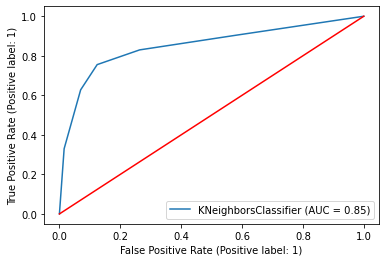

In [28]:
plot_roc_curve(model, X_test_all, y_test)
plt.plot([0,1],[0,1], c='r')

In [30]:
y_score = model.predict_proba(X_test_all)
roc_auc_score(y_test, y_score[:,1])

0.8507751937984496